In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_excel("Test_Data.xlsx")

In [3]:
data.head()

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM1,X1,A1,DIRECT,Small,Powder,2021-06-21,103.68
1,NTM1,X1,A10,DIRECT,Large,Powder,2021-06-21,155.75
2,NTM1,X1,A10,ECOM,Large,Powder,2021-06-21,143.02
3,NTM1,X1,A11,DIRECT,Large,Powder,2021-06-21,139.39
4,NTM1,X1,A2,DIRECT,Large,Powder,2021-06-21,169.42


In [4]:
data = pd.DataFrame(data)
data

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM1,X1,A1,DIRECT,Small,Powder,2021-06-21,103.68
1,NTM1,X1,A10,DIRECT,Large,Powder,2021-06-21,155.75
2,NTM1,X1,A10,ECOM,Large,Powder,2021-06-21,143.02
3,NTM1,X1,A11,DIRECT,Large,Powder,2021-06-21,139.39
4,NTM1,X1,A2,DIRECT,Large,Powder,2021-06-21,169.42
...,...,...,...,...,...,...,...,...
91,NTM3,X1,A44,DIRECT,Small,Liquid,2021-06-21,89.57
92,NTM3,X1,A8,DIRECT,Large,Powder,2021-06-21,114.57
93,NTM3,X1,A8,DIRECT,Small,Powder,2021-06-21,111.26
94,NTM3,X2,A20,DIRECT,Large,Powder,2021-06-21,32.32


In [5]:
data.shape

(96, 8)

In [6]:
data.isnull().sum()

ProductType          0
Manufacturer         0
Area Code            0
Sourcing Channel     0
Product Size         0
Product Type         0
Month of Sourcing    0
Sourcing Cost        0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ProductType        96 non-null     object        
 1   Manufacturer       96 non-null     object        
 2   Area Code          96 non-null     object        
 3   Sourcing Channel   96 non-null     object        
 4   Product Size       96 non-null     object        
 5   Product Type       96 non-null     object        
 6   Month of Sourcing  96 non-null     datetime64[ns]
 7   Sourcing Cost      96 non-null     float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 6.1+ KB


In [8]:
print("ProductType ", data["ProductType"].unique())
print("Manufacturer ", data["Manufacturer"].unique())
print("Area Code ", data["Area Code"].unique())
print("Sourcing Channel ", data["Sourcing Channel"].unique())
print("Product Size ", data["Product Size"].unique())
print("Product Type ", data["Product Type"].unique())

ProductType  ['NTM1' 'NTM2' 'NTM3']
Manufacturer  ['X1' 'X2' 'X3']
Area Code  ['A1' 'A10' 'A11' 'A2' 'A28' 'A29' 'A3' 'A33' 'A34' 'A4' 'A6' 'A7' 'A8'
 'A9' 'A12' 'A21' 'A30' 'A31' 'A39' 'A40' 'A42' 'A43' 'A44' 'A45' 'A46'
 'A16' 'A17' 'A19' 'A23' 'A26' 'A32' 'A36' 'A37' 'A38' 'A41' 'A5' 'A25'
 'A13' 'A14' 'A15' 'A18' 'A24' 'A35' 'A20' 'A22']
Sourcing Channel  ['DIRECT' 'ECOM' 'RETAIL' 'WHOLESALE']
Product Size  ['Small' 'Large' 'ExtraLarge']
Product Type  ['Powder' 'Liquid']


In [9]:
data.describe()

,Month of Sourcing,Sourcing Cost
count,96,96.000000
mean,2021-06-21 00:00:00,106.208021
min,2021-06-21 00:00:00,4.140000
25%,2021-06-21 00:00:00,59.662500
50%,2021-06-21 00:00:00,117.245000
75%,2021-06-21 00:00:00,144.915000
max,2021-06-21 00:00:00,234.710000
std,NaN,52.359484


In [12]:
# Convert 'Month of Sourcing' column to datetime
data['Month of Sourcing'] = pd.to_datetime(data['Month of Sourcing'])

# Extract month and year from "Month of Sourcing" column
data['Sourcing Month'] = data['Month of Sourcing'].dt.month
data['Sourcing Year'] = data['Month of Sourcing'].dt.year

data.drop(columns=['Month of Sourcing'], inplace=True)

sourcing_cost_column = data.pop('Sourcing Cost')
data['Sourcing Cost'] = sourcing_cost_column

from category_encoders import TargetEncoder, OrdinalEncoder

# Initialize the target encoder
target_encoder = TargetEncoder()

# Encode categorical variables directly in the original DataFrame
categorical_cols = ['ProductType', 'Manufacturer', 'Sourcing Channel', 'Area Code', 'Product Type']
data[categorical_cols] = target_encoder.fit_transform(data[categorical_cols], data['Sourcing Cost'])

# Encode 'Product Size' and 'Product Type' using ordinal encoding
ordinal_encoder = OrdinalEncoder(cols=['Product Size', 'Product Type'], mapping=[{'col': 'Product Size', 'mapping': {'Small': 1, 'Large': 2, 'ExtraLarge': 3}}])

data = ordinal_encoder.fit_transform(data)

# Display the updated dataset with encoded variables
data.head()

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Sourcing Month,Sourcing Year,Sourcing Cost
0,112.498655,117.353129,105.879104,106.483532,1,105.413687,6,2021,103.68
1,112.498655,117.353129,113.285398,106.483532,2,105.413687,6,2021,155.75
2,112.498655,117.353129,113.285398,113.907441,2,105.413687,6,2021,143.02
3,112.498655,117.353129,110.817769,106.483532,2,105.413687,6,2021,139.39
4,112.498655,117.353129,116.967156,106.483532,2,105.413687,6,2021,169.42


In [13]:
data.head()

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Sourcing Month,Sourcing Year,Sourcing Cost
0,112.498655,117.353129,105.879104,106.483532,1,105.413687,6,2021,103.68
1,112.498655,117.353129,113.285398,106.483532,2,105.413687,6,2021,155.75
2,112.498655,117.353129,113.285398,113.907441,2,105.413687,6,2021,143.02
3,112.498655,117.353129,110.817769,106.483532,2,105.413687,6,2021,139.39
4,112.498655,117.353129,116.967156,106.483532,2,105.413687,6,2021,169.42


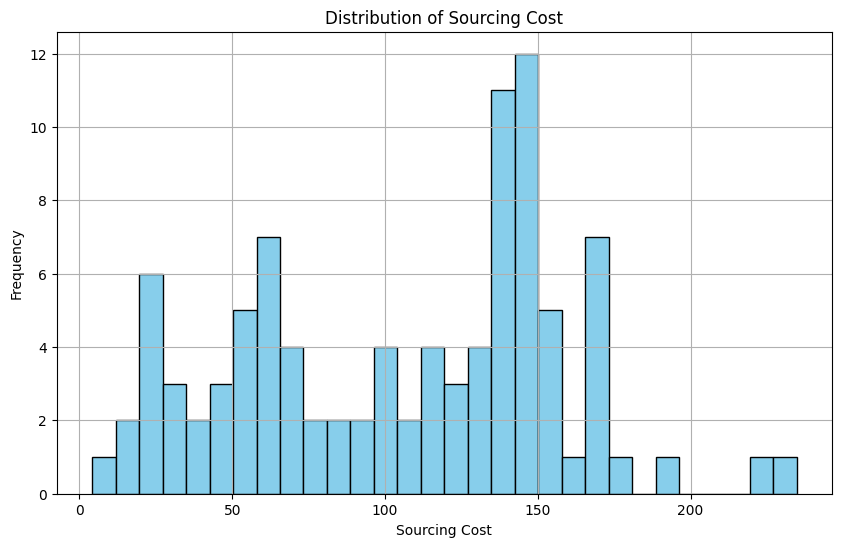

In [14]:
import matplotlib.pyplot as plt

# Plot the distribution of Sourcing Cost
plt.figure(figsize=(10, 6))
plt.hist(data['Sourcing Cost'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Sourcing Cost')
plt.xlabel('Sourcing Cost')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [19]:
data.to_excel("Updated_TestData.xlsx", index=False)